In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df_clean = gdp_df.drop('Value Footnotes', axis=1)

In [5]:
gdp_df_clean.columns =['Country', 'Year', 'GDP_Per_Capita']

7. How many countries have data for all years? 
Which countries are missing many years of data? 
Look at the number of observations per year. What do you notice? 

In [6]:
gdp_df_year_count = gdp_df_clean.groupby('Country').nunique('Year')

In [7]:
gdp_df_year_count

,Year,GDP_Per_Capita
Country,,
Afghanistan,20,20
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
...,...,...
Viet Nam,33,33
West Bank and Gaza,29,29
World,33,33


In [8]:
gdp_df_year_count.value_counts('Year')

Year
33    202
28     10
32      5
23      4
31      3
22      3
29      2
26      2
10      2
12      1
25      1
20      1
19      1
16      1
30      1
15      1
14      1
24      1
Name: count, dtype: int64

In [9]:
gdp_df_year_count[gdp_df_year_count['Year'] == 33]

,Year,GDP_Per_Capita
Country,,
Africa Eastern and Southern,33,33
Africa Western and Central,33,33
Albania,33,33
Algeria,33,33
Angola,33,33
...,...,...
Vanuatu,33,33
Viet Nam,33,33
World,33,33


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


In [10]:
gdp_df_2020 = gdp_df_clean[gdp_df_clean['Year'] == 2020]

In [11]:
gdp_df_2020.drop('Year', axis =1)

,Country,GDP_Per_Capita
1,Afghanistan,1968.341002
22,Africa Eastern and Southern,3455.023119
55,Africa Western and Central,3957.933804
88,Albania,13278.369769
121,Algeria,10844.770764
...,...,...
7503,Viet Nam,10450.622382
7536,West Bank and Gaza,5402.538773
7565,World,16204.169107
7598,Zambia,3183.650773


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

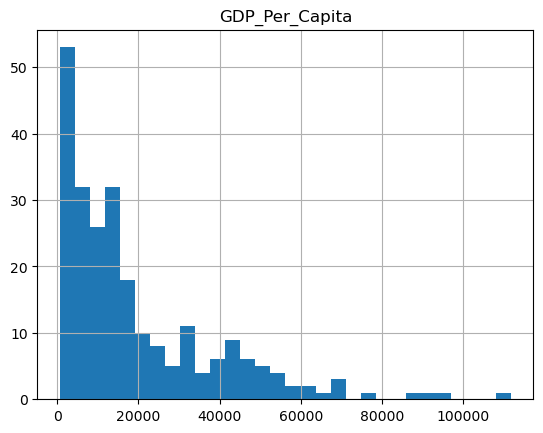

In [12]:
gdp_df_2020.hist('GDP_Per_Capita', bins = 30)

(array([111.,  60.,  24.,  19.,  15.,   5.,   4.,   1.,   2.,   1.]),
 array([   711.35526342,  11815.35121222,  22919.34716101,  34023.3431098 ,
         45127.3390586 ,  56231.33500739,  67335.33095619,  78439.32690498,
         89543.32285377, 100647.31880257, 111751.31475136]),
 <BarContainer object of 10 artists>)

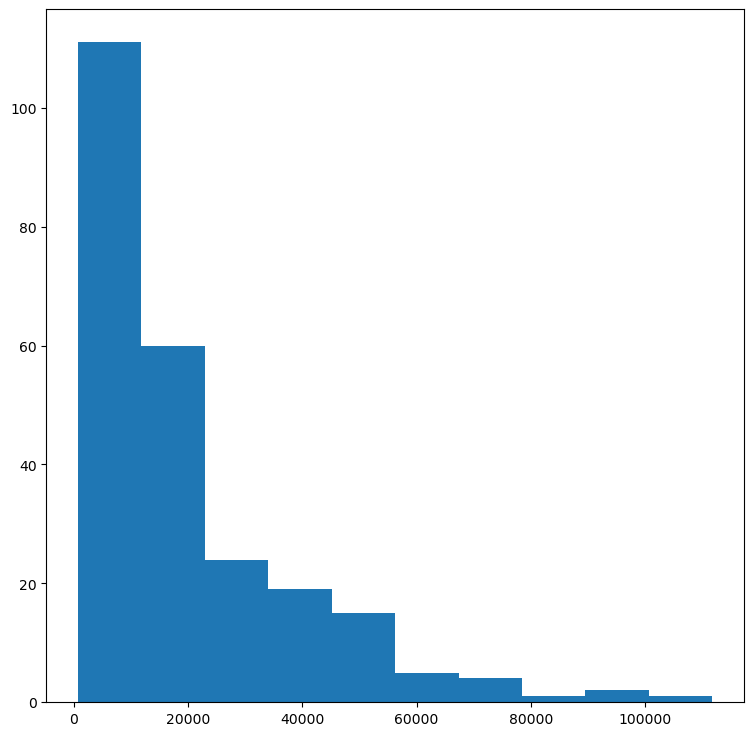

In [13]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.hist(gdp_df_2020['GDP_Per_Capita'])

##first line sets up the graphy itself, the second line plots it and gives its contents.

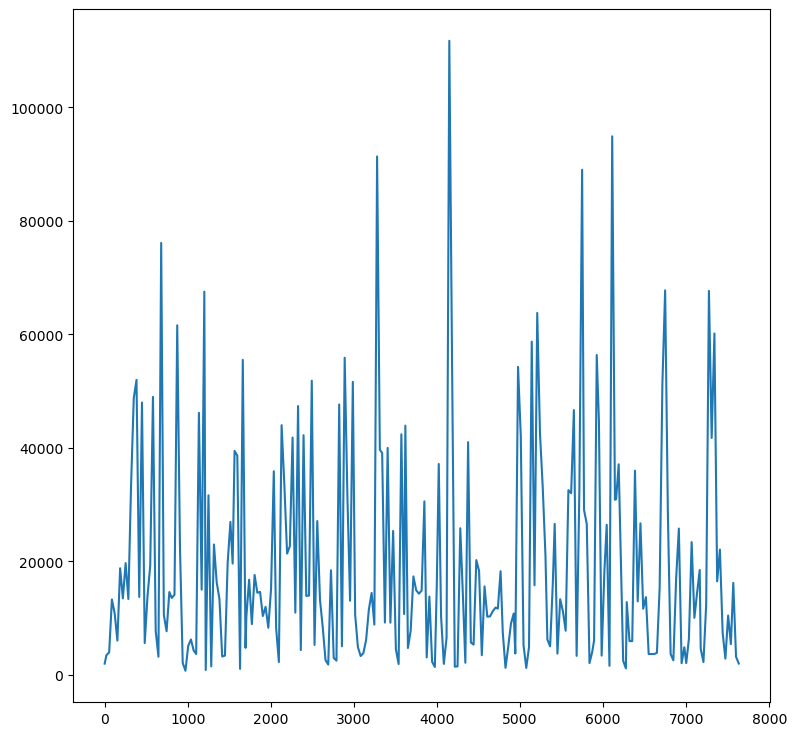

In [14]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.plot(gdp_df_2020['GDP_Per_Capita'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13c5edf50>,
 'caps': [<matplotlib.lines.Line2D at 0x13c5ef710>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c59f890>],
 'medians': [<matplotlib.lines.Line2D at 0x13c5fcd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x13c5fd710>],
 'means': []}

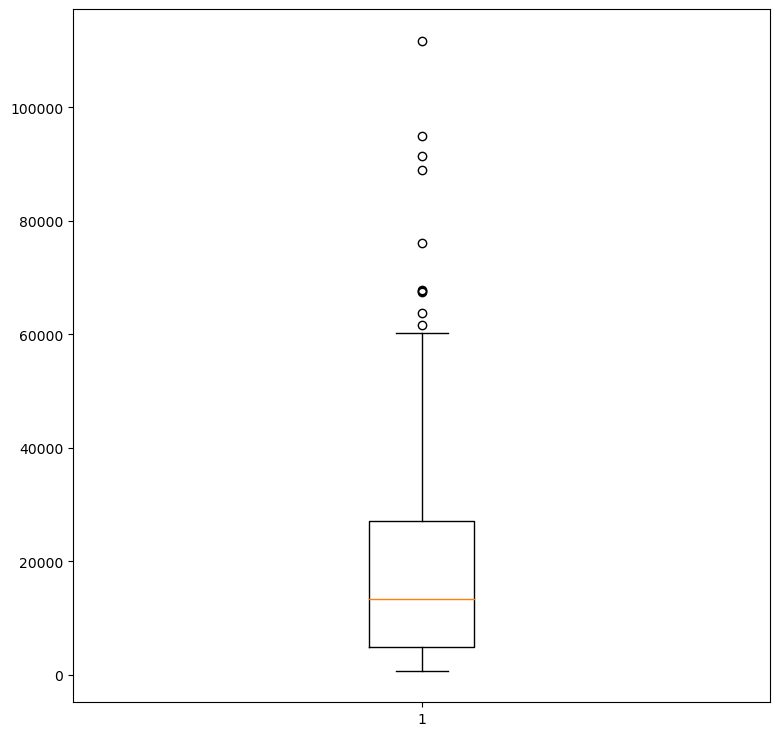

In [15]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.boxplot(gdp_df_2020['GDP_Per_Capita'])

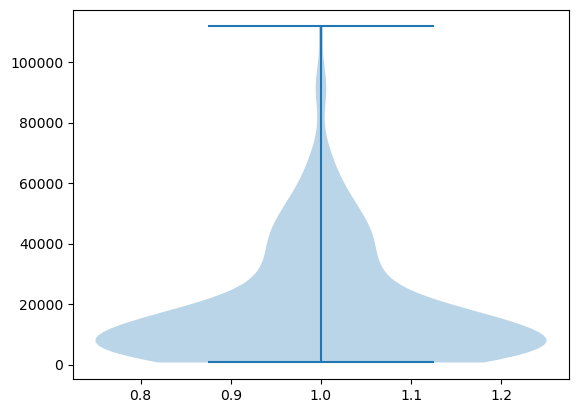

In [16]:
fig, ax = plt.subplots()
vp = ax.violinplot(gdp_df_2020['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [17]:
gdp_df_2020.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2020.0,19586.754446
std,0.0,19640.401631
min,2020.0,711.355263
25%,2020.0,4961.408532
50%,2020.0,13357.997573
75%,2020.0,27064.125293
max,2020.0,111751.314751


10. 
    For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [18]:
gdp_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [19]:
gdp_df_10 = gdp_df_clean[gdp_df_clean["Year"].isin ([1990, 2000, 2010, 2020])]

In [20]:
#gdp_df_clean[gdp_df_clean['Year'] == 2020]

In [21]:
gdp_df_10.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


{'whiskers': [<matplotlib.lines.Line2D at 0x13c6d8a90>,
 'caps': [<matplotlib.lines.Line2D at 0x13c6da2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13c6c8250>],
 'medians': [<matplotlib.lines.Line2D at 0x13c6dba50>],
 'fliers': [<matplotlib.lines.Line2D at 0x13c6e8490>],
 'means': []}

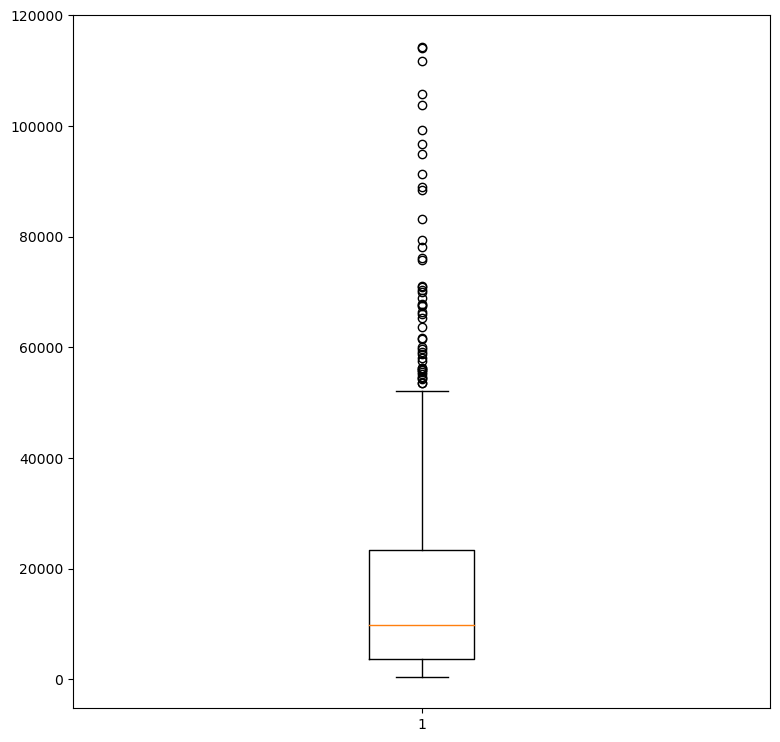

In [22]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.boxplot(gdp_df_10['GDP_Per_Capita'])

<BarContainer object of 921 artists>

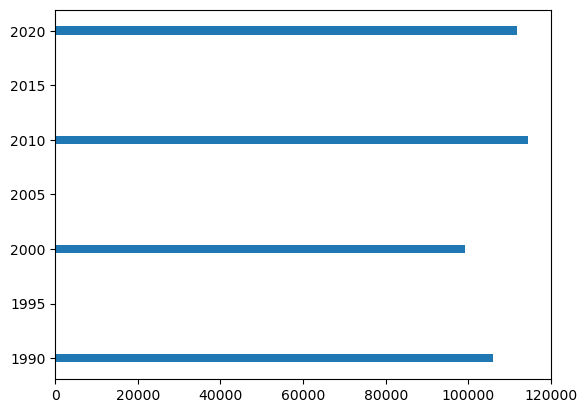

In [23]:
plt.barh(y=gdp_df_10.Year, width=gdp_df_10.GDP_Per_Capita)

In [24]:
int_use = pd.read_csv('../data/internet_use.csv', nrows = 6084)

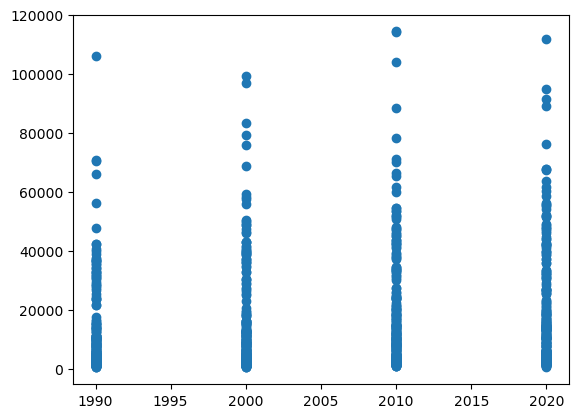

In [25]:
plt.scatter(x=gdp_df_10['Year'], y=gdp_df_10['GDP_Per_Capita'])

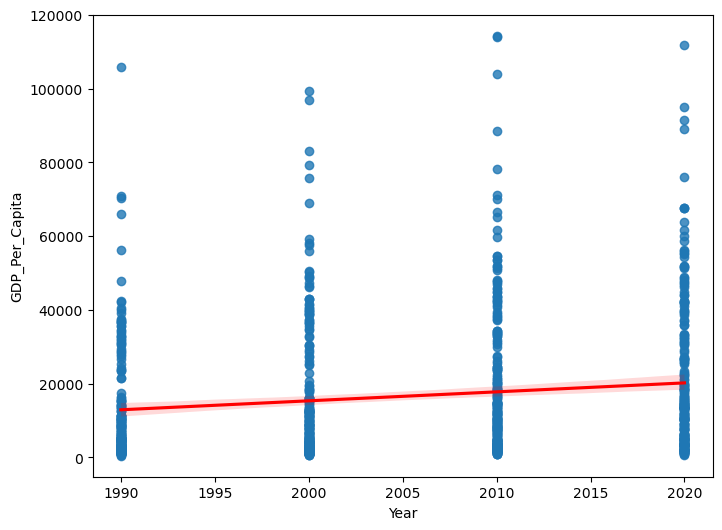

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_df_10["Year"],
    y=gdp_df_10["GDP_Per_Capita"],
    line_kws={"color": "r"},
    ax=ax
)
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [27]:
gdp_df_clean.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [28]:
gdp_ht.head

NameError: name 'gdp_ht' is not defined